In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import moment

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

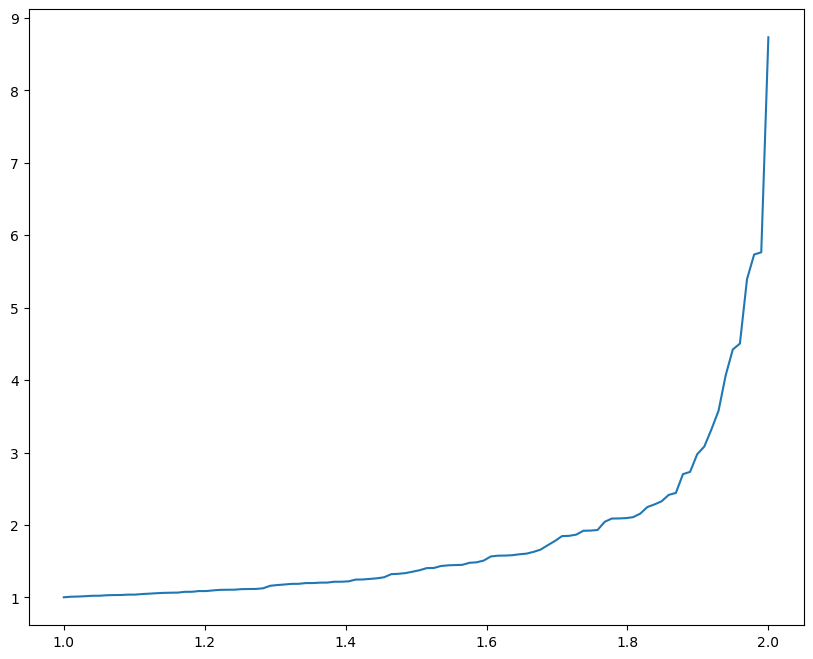

In [9]:
def func1(x, ТЭЭТТАА):
    return (1 - x) ** (1 / (1 - ТЭЭТТАА))

N = 100
ТЭЭТТАА = 3
a = 0.05

np.random.seed(204863)
X = [func1(x, ТЭЭТТАА) for x in np.random.sample(N)]
X.sort()
x = np.linspace(1, 2, 100)
plt.plot(x, X)
plt.show()

In [26]:
тета_оценили_типа = N / np.sum(np.log(X)) + 1
print("\n","ОМП: тета оц. = ", тета_оценили_типа)

right0 = (1.96 * np.log(2) * (2 ** (1 / (тета_оценили_типа - 1)))) / (тета_оценили_типа - 1) / 10 + 2 ** (1 / (тета_оценили_типа -1))
left0 = (-(1.96 * np.log(2) * (2 ** (1 / (тета_оценили_типа - 1)))) / (тета_оценили_типа - 1) / 10 + 2 ** (1 / (тета_оценили_типа -1)))
print(f"Доверительный размах для медианы: [{round(left0, 4)}, {round(right0, 4)}]")
print("Размах = ",round(abs(left0 - right0), 4), "\n")


 ОМП: тета оц. =  3.1863944109696107
Доверительный размах для медианы: [1.2877, 1.4584]
Размах =  0.1706 



In [29]:
left1 = -1.96 * (тета_оценили_типа - 1) / np.sqrt(N) + тета_оценили_типа
right1 = 1.96 * (тета_оценили_типа - 1) / np.sqrt(N) + тета_оценили_типа
print()
print(f"Асимптотический доверительный интервал: [{round(left1, 4)}, {round(right1, 4)}]")
print("Размах = ", round(abs(left1 - right1), 4))
print()


Асимптотический доверительный интервал: [2.7579, 3.6149]
Размах =  0.8571



In [28]:
def func2(X, N):
    return 1 + N / sum([np.log(x) for x in X])

M = np.sort(np.array([func2([func1(x, ТЭЭТТАА) for x in np.random.sample(N)], N) for i in range(50000)]))

left2 = M[int(a / 2 * 50000)]
right2 = M[int((1 - a / 2) * 50000)]
print()
print(f"bootstrap'оуски параметрический интервал: [{round(left2, 4)}, {round(right2, 4)}]")
print("Размах = ", round(abs(left2 - right2), 4))
print()


bootstrap'оуски параметрический интервал: [2.6599, 3.4585]
Размах =  0.7986



In [27]:
M = np.array([])
for i in range(1000):
    M = np.append(M, N / np.sum(np.log((np.random.choice(X, size = len(X))))) + 1 - тета_оценили_типа)

M = np.sort(M)

left3 = тета_оценили_типа + M[74]
right3 = тета_оценили_типа + M[974]
print()
print(f"bootstrap'оуский непараметрический интервал: [{round(left3, 4)}, {round(right3, 4)}]")
print("Размах = ", round(abs(left3 - right3), 4))
print()


bootstrap'оуский непараметрический интервал: [2.8943, 3.7632]
Размах =  0.8689



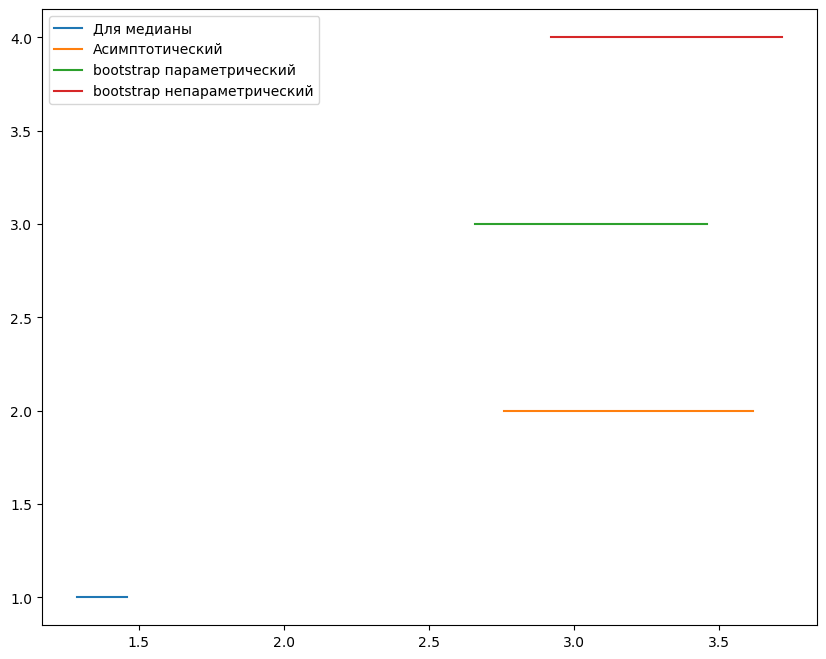

In [15]:

plt.plot(np.linspace(left, right, 100), [1 for _ in range(100)])
plt.plot(np.linspace(left0, right0, 100), [2 for _ in range(100)])
plt.plot(np.linspace(left2, right2, 100), [3 for _ in range(100)])
plt.plot(np.linspace(left3, right3, 100), [4 for _ in range(100)])

plt.legend(["Для медианы", "Асимптотический", "bootstrap параметрический", "bootstrap непараметрический"])